In [3]:
import cv2 as cv
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from sklearn.decomposition import PCA

In [9]:
data_dir = r"/home/ec2-user/dataset/test"
img_exts = ["jpeg", "jpg", "png"]

In [10]:
def pca_fit(img):
    (b,g,r) =  cv.split(img)
    r, g, b = r/255, g/255, b/255
    pca_components = 50

    pca_r = PCA(n_components=pca_components)
    r_reduz = pca_r.fit_transform(r)
    pca_g = PCA(n_components=pca_components)
    g_reduz = pca_g.fit_transform(g)
    pca_b = PCA(n_components=pca_components)
    b_reduz = pca_b.fit_transform(b)
    
    recog_r = pca_r.inverse_transform(r_reduz)
    recog_g = pca_g.inverse_transform(g_reduz)
    recog_b = pca_b.inverse_transform(b_reduz)
    
    return cv.merge((recog_r, recog_g, recog_b))

In [11]:
X = []
y = []

for img_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, img)
        try:
            img_read = cv.imread(img_path)
            _type = imghdr.what(img_path)
            if _type not in img_exts:
                print("img extension not in img_exts {}".format(img_path))
                os.remove(img_path)
            new_img = pca_fit(img_read)
            cv.imwrite(r"/home/ec2-user/dataset_pca/test/{}/{}".format(img_class, img), 255*new_img)
        except Exception as e:
            print("issue with image {}".format(img_path))

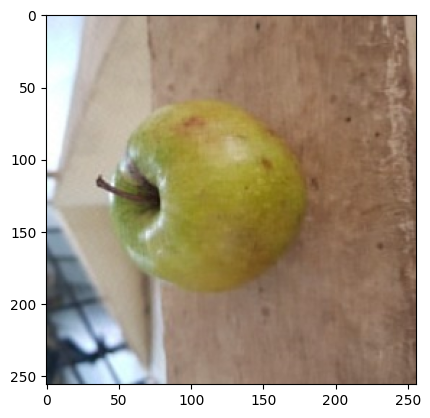

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
test_img_path = cv.imread(r"/home/ec2-user/dataset_pca/train/{}/{}".format("apple", "20190809_115439.jpg"))
plt.imshow(test_img_path)